In [1]:
#LAVINET
#wszystko wziac pod uwage przy analizie
#k-rdzenie
#moduly

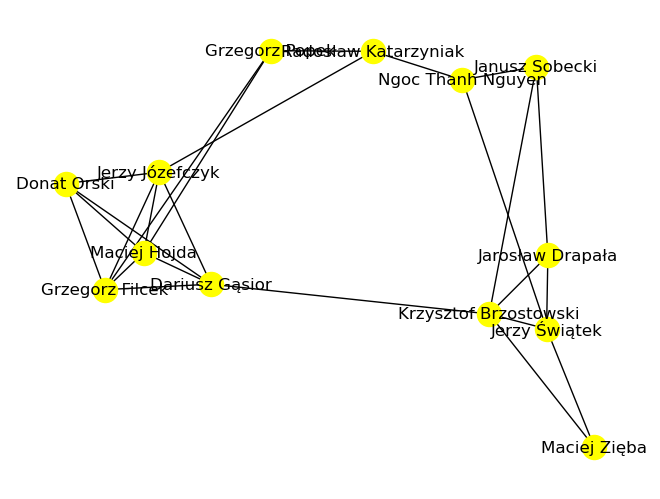

In [2]:
import networkx as nx
import matplotlib.pyplot as plt

E = []
V = []
with open ("edges.txt",encoding="utf-8") as f:
    text = f.readlines()
    for linia in text:
        linia = linia.rstrip('\n')
        currentlinia = linia.split(", ")
        i = 0
        tupl = ()

        for text in currentlinia:

            if i!= 2:
                tupl = tupl + (text,)
                if text not in V:
                    V.append(text)
            else:
                tupl = tupl + (float(text),)
            i+=1
#        integer = int(tupl[-1])
#        new_tupl = tupl[:2] + (integer)
        E.append(tupl)

E.remove(('',))
E.remove(('',))
E.remove(('',))
E.remove(('',))
V.remove('')

#print(E)
#print(V)
g = nx.Graph()
pos = nx.spring_layout(g)

#g.add_nodes_from(V)
g.add_weighted_edges_from(E)

nx.draw(g,  with_labels=True, node_color='yellow')
labels = nx.get_edge_attributes(g,'weight')
#trzeba ustalić stałą pozycję dla wierzchołkow jakoś?
#for edge in g.edges(data='weight'):
#    nx.draw_networkx_edges(g, pos, edgelist=[edge], width=edge[2])
#nx.draw_networkx_edge_labels(g,pos,edge_labels=labels)
plt.show()

circular done
Random done


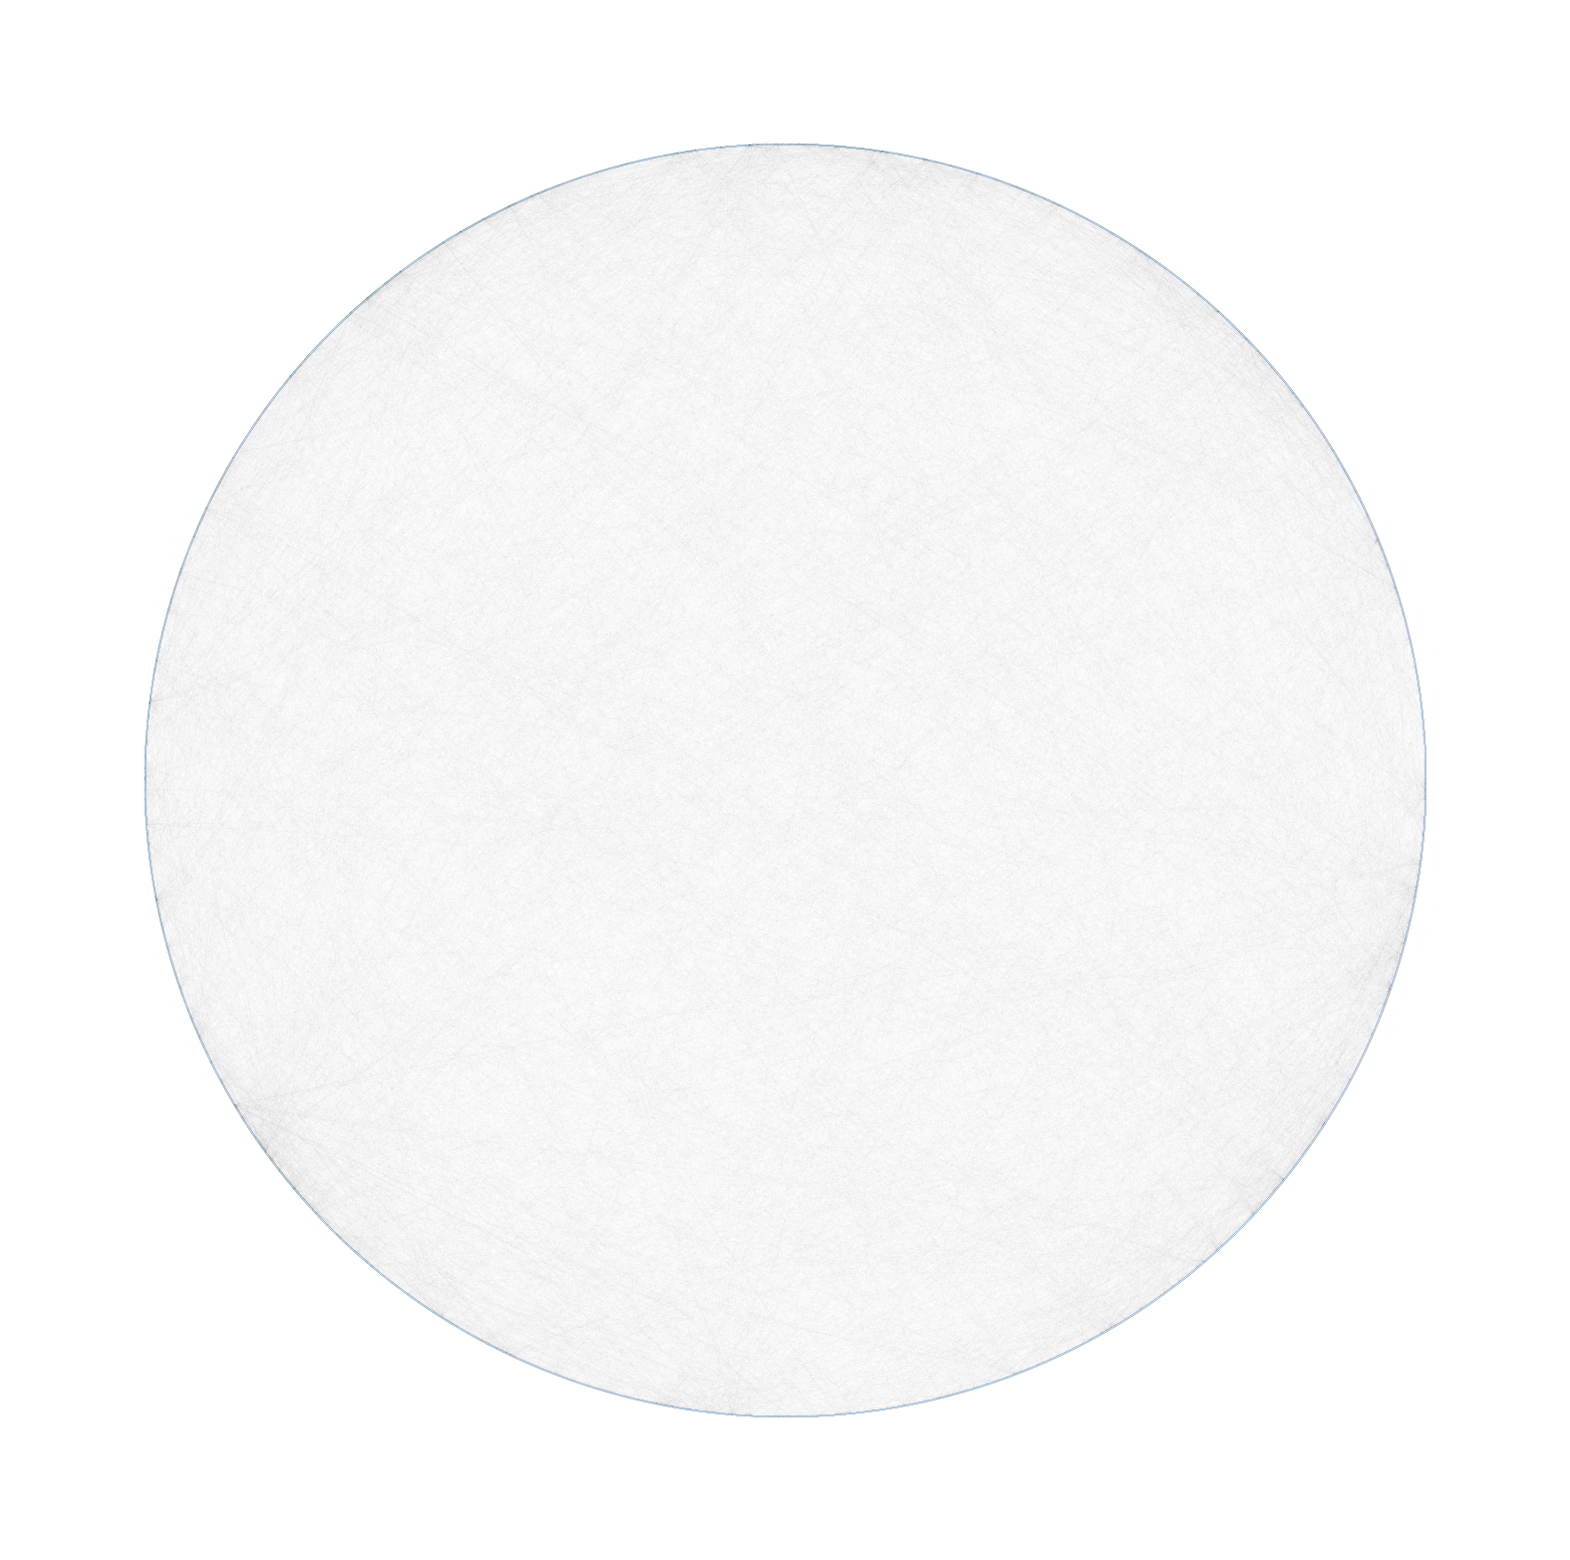

In [3]:
E = []
V = []
with open ("ARXIV_NODE_NAMES.txt",encoding="utf-8") as f:
    text = f.readlines()
    for linia in text:
        linia = linia.rstrip('\n')
        currentlinia = linia.rsplit(" ")
        V.append(currentlinia)


with open ("ARXIV_EDGES.txt",encoding="utf-8") as f:
    text = f.readlines()
    for linia in text:
        linia = linia.rstrip('\n')
        currentlinia = linia.rsplit(" ")
        E.append(currentlinia)



    


#print(E)
#print(V)
Graph = nx.Graph()

    
for [label, surname, name_first_letter] in V:
    Graph.add_node(label, name = name_first_letter+'. '+surname[:-1])

    
for [a, b] in E:
    Graph.add_edge(a, b)

    
pos_circular = nx.circular_layout(Graph)
print('circular done')    
pos_random = nx.random_layout(Graph)
print('Random done')    
fig, ax = plt.subplots(figsize=(20,20))
nx.draw(Graph, pos=pos_circular, with_labels=False, node_size=0.0001, width=0.0001)


plt.show()


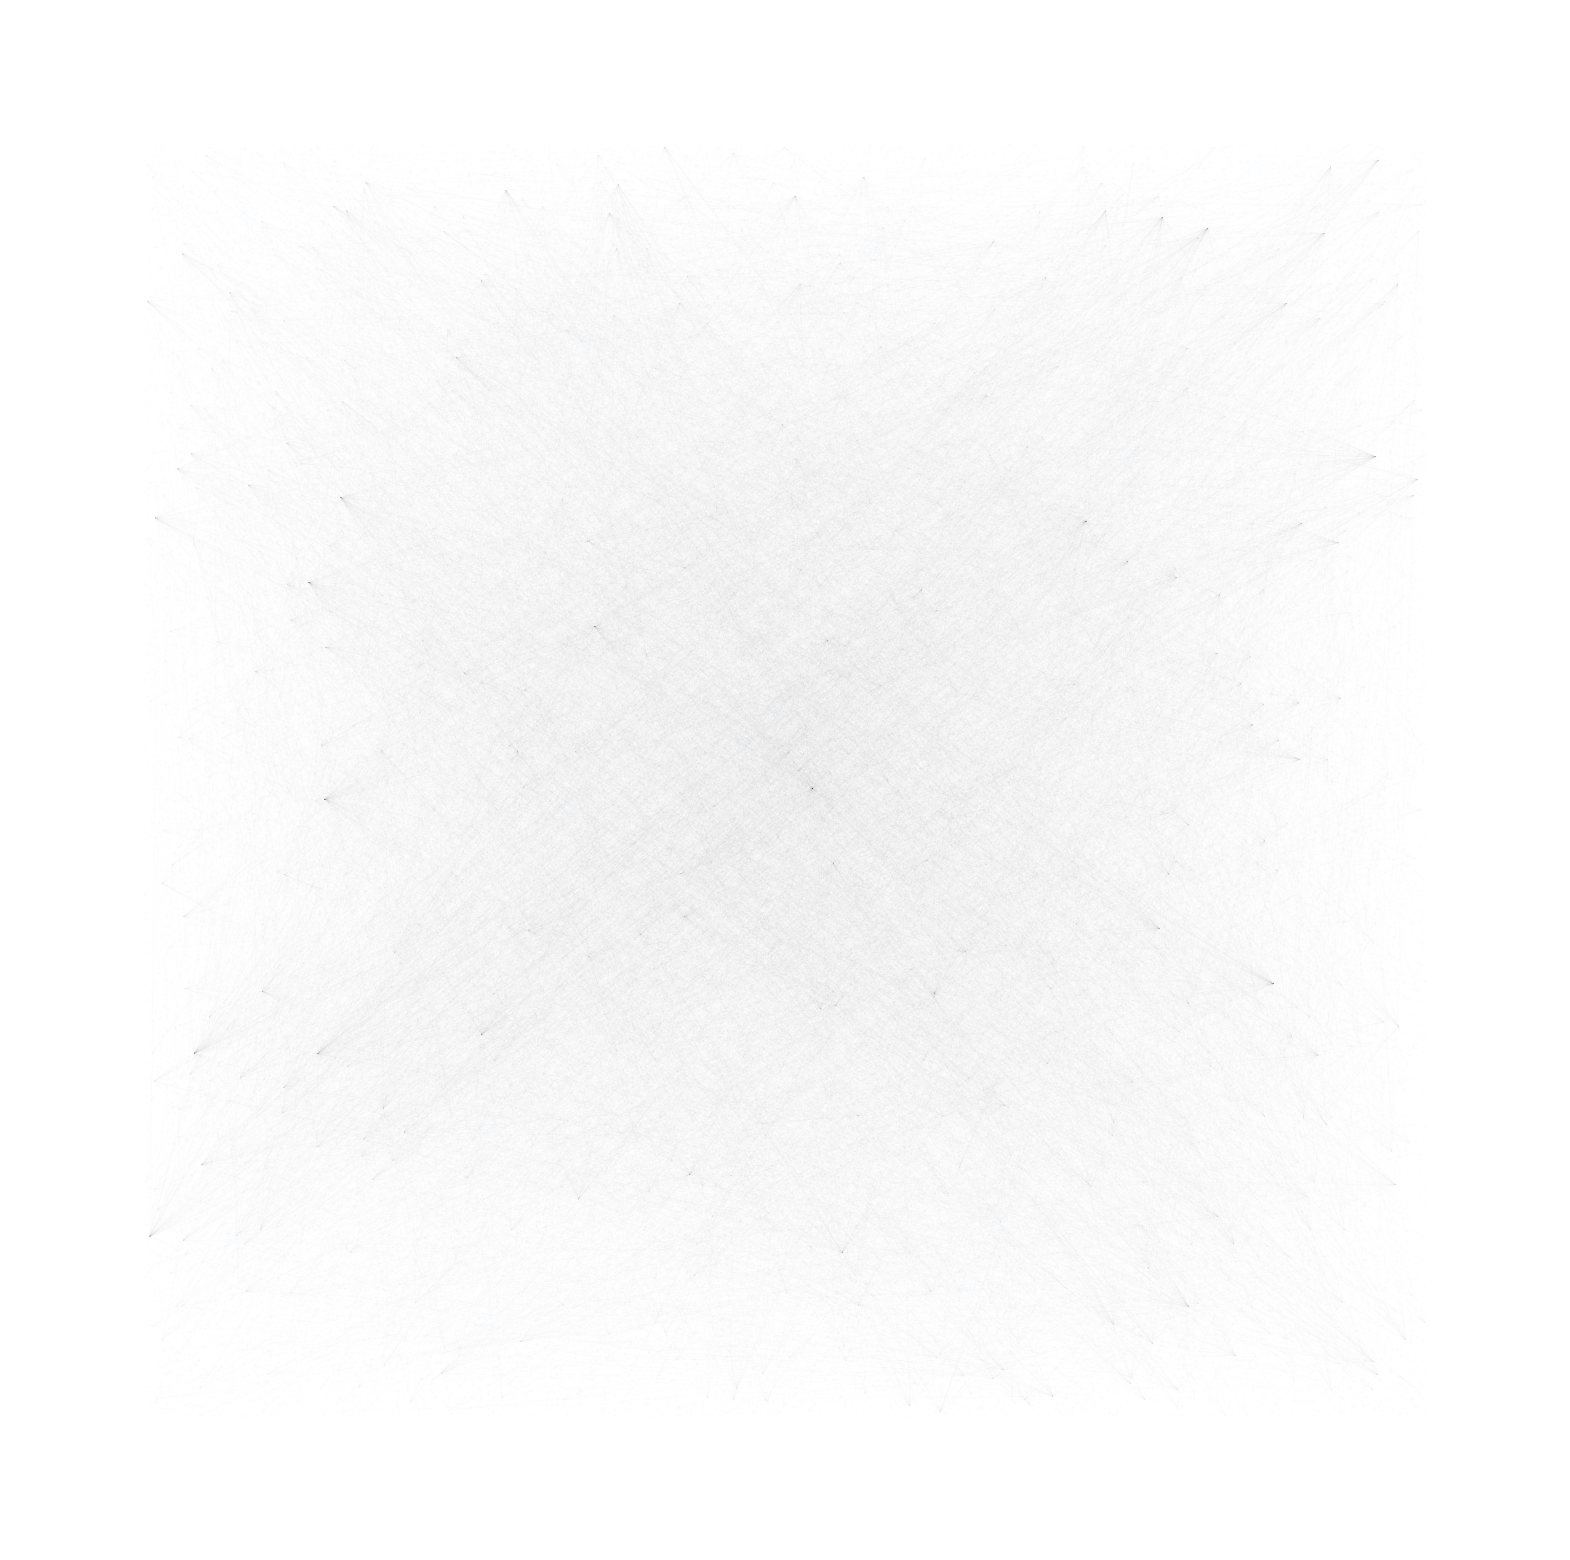

In [6]:
fig, ax = plt.subplots(figsize=(20,20))
nx.draw(Graph, pos=pos_random, with_labels=False, node_size=0.0001, width=0.0001)


plt.show()

In [7]:
import networkx.algorithms.community as nx_comm
nx.is_connected(Graph)
#nx_comm.modularity(Graph, nx_comm.asyn_fluidc(Graph, k=3))
#nx_comm.modularity(Graph, nx_comm.label_propagation_communities(G))

False

In [8]:
largest_cc = max(nx.connected_components(Graph), key=len)
S = Graph.subgraph(largest_cc).copy()

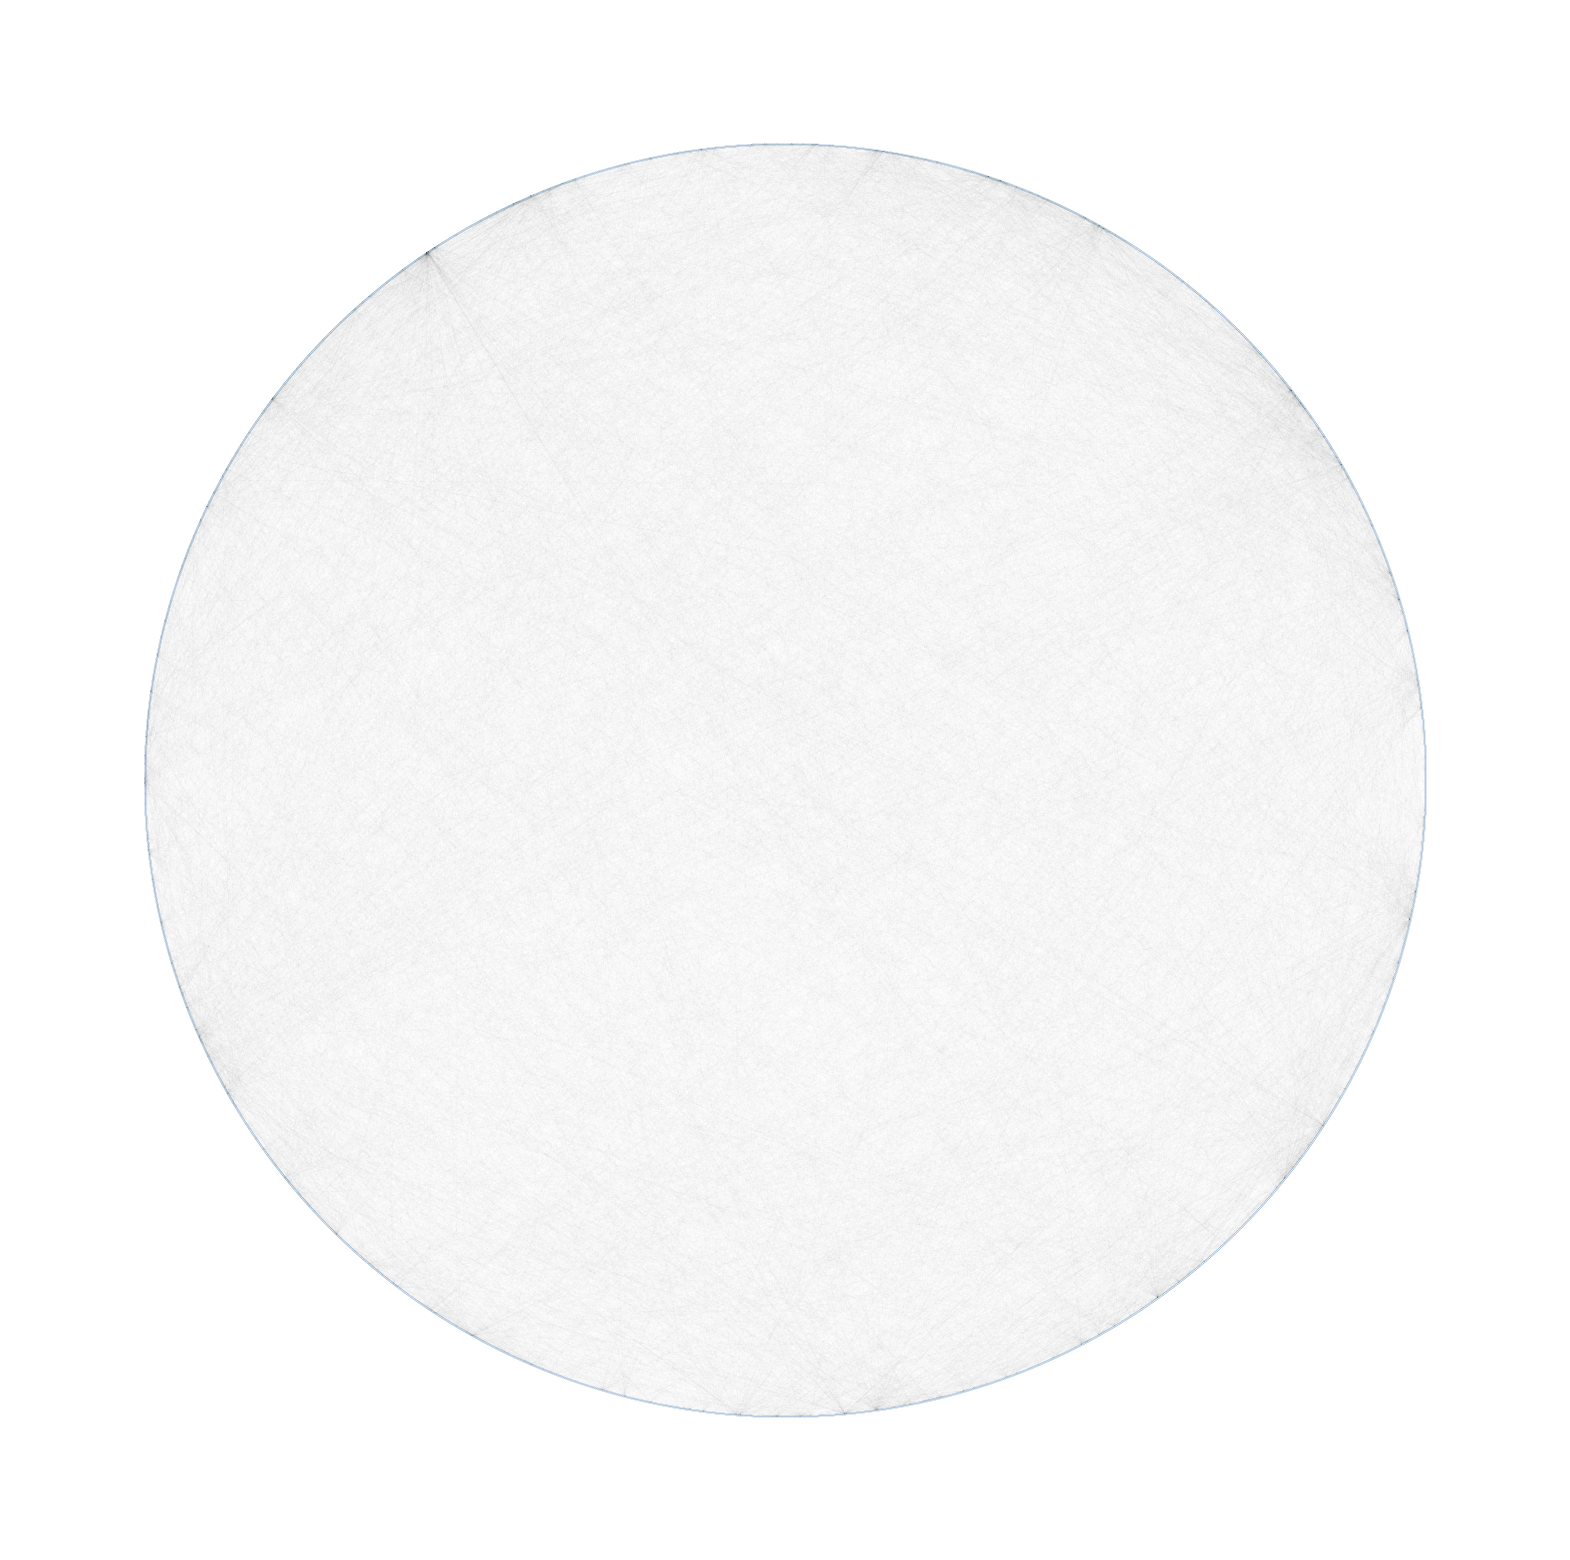

In [9]:
fig, ax = plt.subplots(figsize=(20,20))
nx.draw(S, pos=nx.circular_layout(S), with_labels=False, node_size=0.0001, width=0.0001)


plt.show()


In [10]:

nx_comm.modularity(S, nx_comm.label_propagation_communities(S))

0.6921725022153097

In [14]:
print(nx.density(S))
print(nx.density(Graph))

0.0002434155049804031
0.0001752575134807215


In [23]:
nx.average_clustering(S)

0.6157424210513311

In [24]:
nx.average_clustering(Graph)

0.5641144580697607

In [17]:
nx.transitivity(S)

0.4508767175383571

In [26]:
nx.transitivity(Graph)

0.4515125390949958

In [87]:
#dŁugo zajmuje
nx.diameter(S)

20

In [ ]:
diameter = 20
#zajęło to ponad godzinę

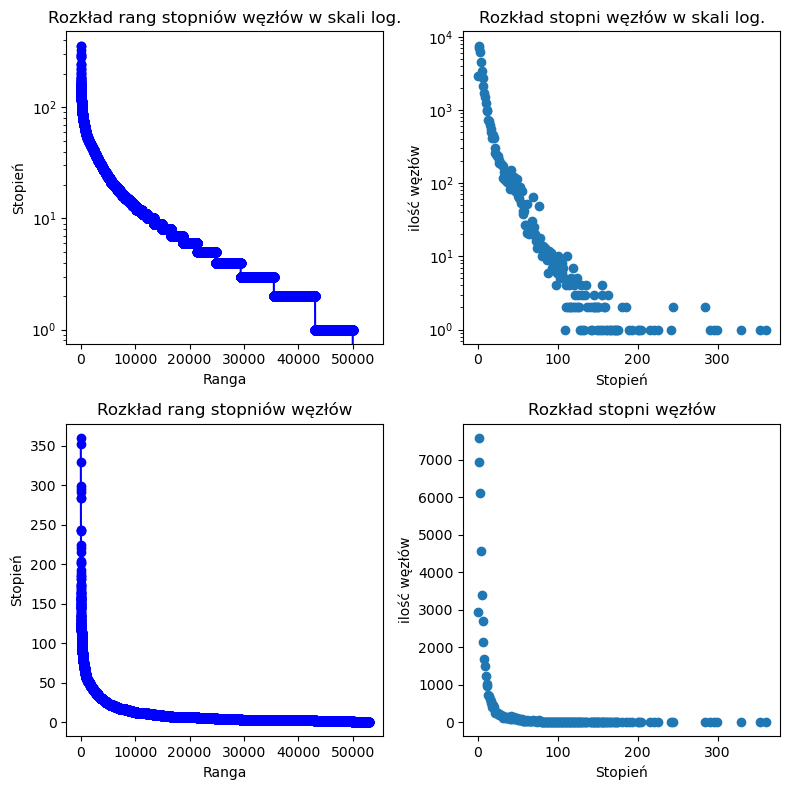

In [4]:
import numpy as np
degree_sequence = sorted((d for n, d in Graph.degree()), reverse=True)
dmax = max(degree_sequence)

fig = plt.figure("Degree of a random graph", figsize=(8, 8))
# Create a gridspec for adding subplots of different sizes
axgrid = fig.add_gridspec(8, 8)

ax0 = fig.add_subplot(axgrid[0:4, :4])
plt.yscale('log')
ax0.plot(degree_sequence, "b-", marker="o")
ax0.set_title("Rozkład rang stopniów węzłów w skali log.")
ax0.set_ylabel("Stopień")
ax0.set_xlabel("Ranga")


ax1 = fig.add_subplot(axgrid[4:, :4])
ax1.plot(degree_sequence, "b-", marker="o")
ax1.set_title("Rozkład rang stopniów węzłów")
ax1.set_ylabel("Stopień")
ax1.set_xlabel("Ranga")

ax2 = fig.add_subplot(axgrid[4:, 4:])
ax2.scatter(*np.unique(degree_sequence, return_counts=True))
ax2.set_title("Rozkład stopni węzłów")
ax2.set_xlabel("Stopień")
ax2.set_ylabel("ilość węzłów")


ax2 = fig.add_subplot(axgrid[0:4, 4:])
plt.yscale('log')
ax2.scatter(*np.unique(degree_sequence, return_counts=True))
ax2.set_title("Rozkład stopni węzłów w skali log.")
ax2.set_xlabel("Stopień")
ax2.set_ylabel("ilość węzłów")

fig.tight_layout()
plt.show()

k-rdzeń o k = 77
k-rdzeń składa się z 78 autorów ARXIV


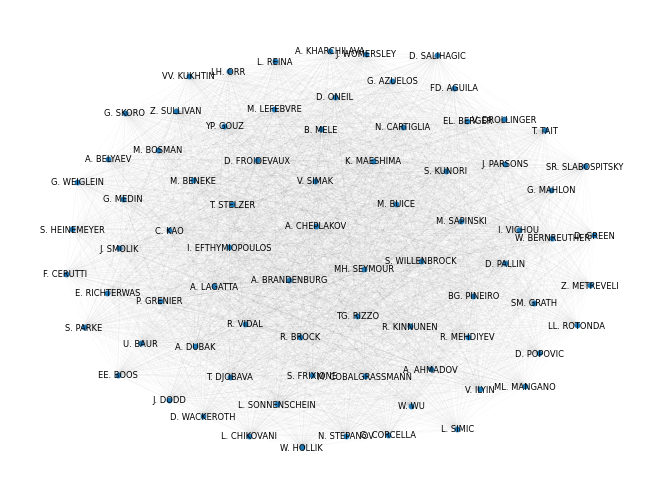

In [53]:
# analiza k-rdzeni
main_core = nx.k_core(Graph)
degree_sequence = sorted((d for n, d in main_core.degree()), reverse=True)
dmax = max(degree_sequence)
print(f"k-rdzeń o k = {dmax}")
print(f"k-rdzeń składa się z {nx.number_of_nodes(main_core)} autorów ARXIV")
labels=nx.get_node_attributes(main_core, 'name')
#print(labels)
nx.draw(main_core, with_labels=True, labels=nx.get_node_attributes(main_core, 'name'),node_size=10, width=0.01, font_size=6)
plt.show()
# to jest siec najsilniej usieciowionych autorów

In [59]:
# kliki
clicks = nx.find_cliques(Graph)
clicks = list(clicks)
# klika z 2 eleemntami nie jest interesujaca
clicks = [sorted(click) for click in clicks if len(click) > 2]
#clicks = [click for click in clicks if len(click) == max([len(click) for click in clicks])]


print(f'kazdy z tych autorów wystepuje ze soba bezposrednio polaczony:')
for click in clicks:
    names = [Graph.nodes[node]['name'] for node in click]
    print(f'klika: {names}')
    


kazdy z tych autorów wystepuje ze soba bezposrednio polaczony:
klika: ['K. BERING', 'PH. DAMGAARD', 'J. ALFARO']
klika: ['LF. URRUTIA', 'R. MEDINA', 'J. ALFARO']
klika: ['LF. URRUTIA', 'HA. MORALESTECOTL', 'J. ALFARO']
klika: ['LF. URRUTIA', 'O. CUBERO', 'J. ALFARO']
klika: ['D. ESPRIU', 'A. DOBADO', 'J. ALFARO']
klika: ['JS. HEYL', 'NJ. SHAVIV', 'Y. LITHWICK']
klika: ['H. NAKADA', 'Y. ALHASSID', 'GF. BERTSCH', 'S. LIU']
klika: ['X. WANG', 'G. LU', 'L. WAN', 'Z. XIAO', 'S. LIU']
klika: ['RAC. CROFT', 'R. DAVE', 'D. TYTLER', 'S. BURLES', 'D. KIRKMAN', 'J. PHILLIPS', 'DH. WEINBERG', 'M. PETTINI', 'J. WRIGHT', 'G. GOMEZ', 'L. HERNQUIST', 'J. MIRALDAESCUDE', 'N. KATZ', 'S. LIU']
klika: ['J. WEI', 'L. HAO', 'S. LIU']
klika: ['D. MONDEREN', 'A. GEVAERT', 'R. ESCRIBANO', 'JM. FRERE']
klika: ['M. LEE', 'VL. NGUYEN', 'BI. SHKLOVSKII', 'JG. MASSEY']
klika: ['KJ. LEE', 'EC. COX', 'RE. GOLDSTEIN']
klika: ['D. RING', 'S. URANO', 'R. ARNOWITT']
klika: ['NZ. IORGOV', 'AM. GAVRILIK', 'DV. ANCHISHKIN']

In [77]:
clicks = [click for click in clicks if len(click) == max([len(click) for click in clicks])]
print(f'Największa klika rzędu {len(clicks[0])}')
for click in clicks:
    names = [Graph.nodes[node]['name'] for node in click]
    print(f'klika: {names}')
    

Największa klika rzędu 78
klika: ['D. POPOVIC', 'W. WU', 'G. AZUELOS', 'S. HEINEMEYER', 'D. WACKEROTH', 'Z. SULLIVAN', 'J. WOMERSLEY', 'A. BRANDENBURG', 'N. CARTIGLIA', 'E. RICHTERWAS', 'D. FROIDEVAUX', 'A. KHARCHILAVA', 'R. KINNUNEN', 'S. KUNORI', 'YP. GOUZ', 'D. GREEN', 'R. BROCK', 'I. EFTHYMIOPOULOS', 'A. AHMADOV', 'M. BOSMAN', 'M. BUICE', 'F. CERUTTI', 'A. CHEPLAKOV', 'L. CHIKOVANI', 'M. COBALGRASSMANN', 'T. DJOBAVA', 'J. DODD', 'V. DROLLINGER', 'A. DUBAK', 'BG. PINEIRO', 'P. GRENIER', 'VV. KUKHTIN', 'LL. ROTONDA', 'A. LAGATTA', 'M. LEFEBVRE', 'K. MAESHIMA', 'SM. GRATH', 'G. MEDIN', 'R. MEHDIYEV', 'Z. METREVELI', 'D. ONEIL', 'D. PALLIN', 'D. SALIHAGIC', 'M. SAPINSKI', 'V. SIMAK', 'L. SIMIC', 'G. SKORO', 'J. SMOLIK', 'L. SONNENSCHEIN', 'I. VICHOU', 'R. VIDAL', 'J. PARSONS', 'S. WILLENBROCK', 'TG. RIZZO', 'L. REINA', 'FD. AGUILA', 'M. BENEKE', 'S. FRIXIONE', 'ML. MANGANO', 'EE. BOOS', 'U. BAUR', 'B. MELE', 'W. HOLLIK', 'T. STELZER', 'C. KAO', 'N. STEPANOV', 'W. BERNREUTHER', 'MH. SEY

In [85]:
filepath = "ARXIV_EDGES.txt"
with open(filepath) as fp:
    lines = fp.read().splitlines()
with open("ARXIV_EDGES_nowe.txt", "w") as fp:
    for line in lines:
        print("'" + line + "'", file=fp)

In [86]:
import gzip
with open("ARXIV_EDGES_nowe.txt", 'rb') as f_in, gzip.open('ARXIV_EDGES_final.gz', 'wb') as f_out:
    f_out.writelines(f_in)

In [ ]:
pos_kamada = nx.kamada_kawai_layout(Graph)

In [ ]:
pos_spring =  = nx.spring_layout(Graph)


In [ ]:
print('done')